In [13]:
# 必要なライブラリをimportします
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# 可視化のためのセットです。
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# from pandas.io.data import DataReader
from pandas_datareader import data, wb

from datetime import datetime

In [14]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [15]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,144.736786,145.691667,143.852222,144.874563,143.659303,2.722444e+07
std,16.597748,16.641305,16.311262,16.471780,16.938474,1.138106e+07
min,109.169998,110.029999,108.250000,109.110001,107.383171,1.147590e+07
25%,137.320004,137.469997,136.599998,137.080002,135.495422,2.034908e+07
50%,145.819999,147.180001,145.035004,146.309998,144.860894,2.450725e+07
75%,156.412506,157.377495,155.150002,156.077507,155.426262,3.043112e+07
max,175.110001,176.240005,174.649994,176.240005,175.608719,1.119850e+08


In [16]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-11-25 to 2017-11-24
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


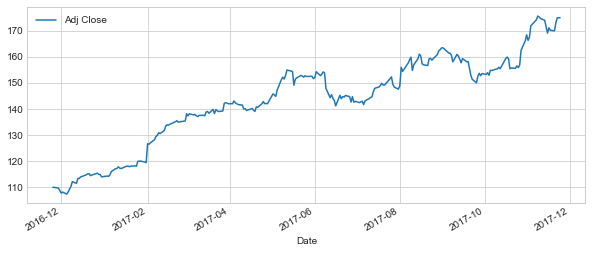

In [17]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

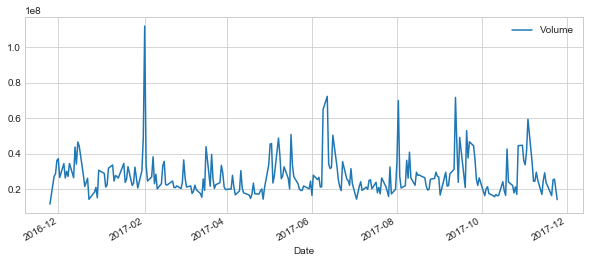

In [18]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [20]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA {}".format(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """
//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """
//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  """


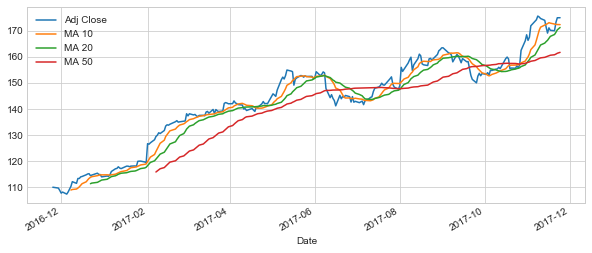

In [23]:
AAPL[['Adj Close','MA 10','MA 20','MA 50']].plot(subplots=False,figsize=(10,4))

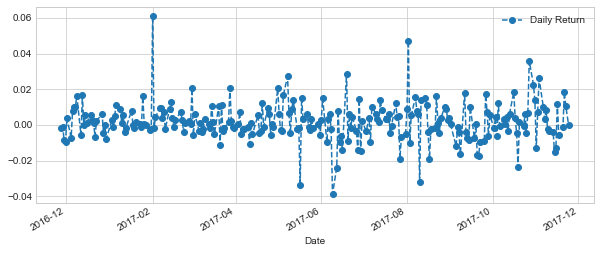

In [28]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

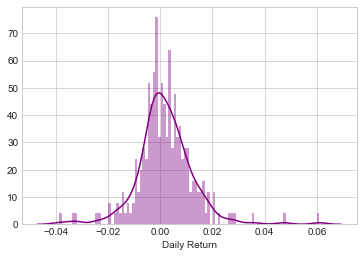

In [30]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [33]:
closing_df = data.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [34]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-11-24,174.970001,1186.000000,1040.609985,83.260002
2017-11-22,174.960007,1156.160034,1035.959961,83.110001
2017-11-21,173.139999,1139.489990,1034.489990,83.720001
2017-11-20,169.979996,1126.310059,1018.380005,82.529999
2017-11-17,170.149994,1129.880005,1019.090027,82.400002


In [35]:
tech_rets = closing_df.pct_change()

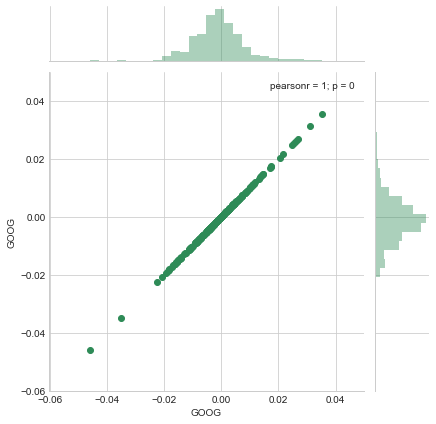

In [37]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

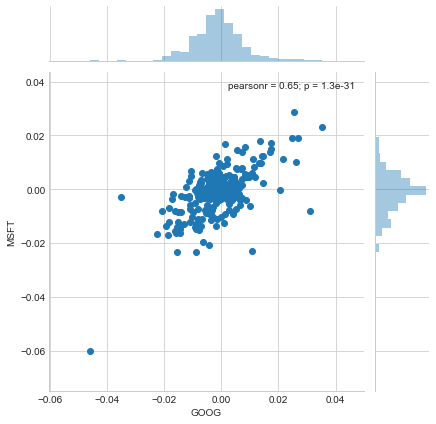

In [38]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

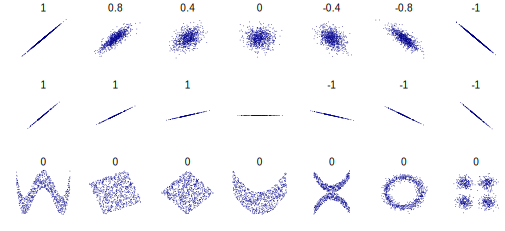

In [39]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')